In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import fetch_california_housing

dataset  = fetch_california_housing(as_frame = True)

In [25]:
X = dataset.data
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


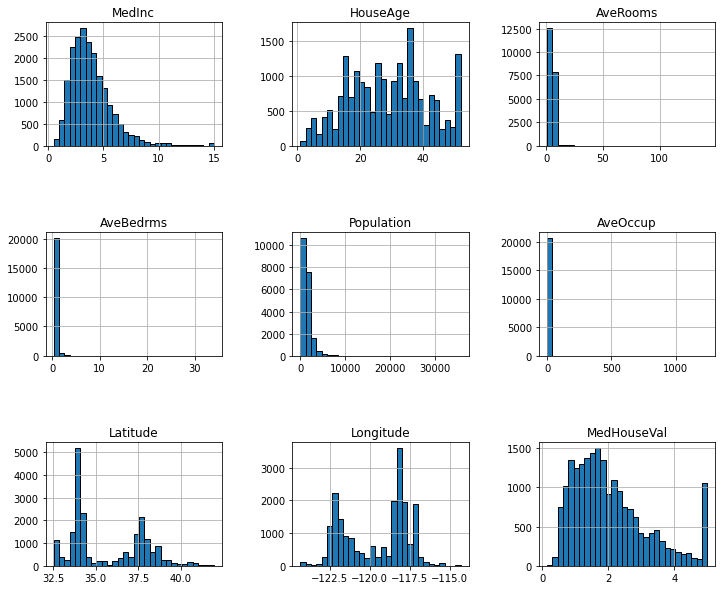

In [3]:
dataset.frame.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

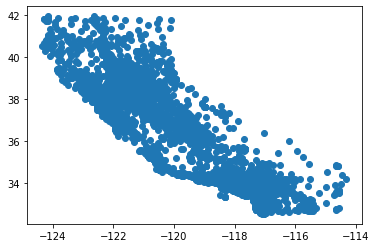

In [4]:
plt.scatter(X['Longitude'],X['Latitude'])

In [5]:
X = X.loc[:, ["MedInc", "Latitude", "Longitude"]]

In [6]:
X.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


###Cluster sayısı 2 olursa:

In [7]:
kmeans = KMeans(n_clusters=2)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

X.head(10)

,MedInc,Latitude,Longitude,Cluster
0,8.3252,37.88,-122.23,1
1,8.3014,37.86,-122.22,1
2,7.2574,37.85,-122.24,1
3,5.6431,37.85,-122.25,1
4,3.8462,37.85,-122.25,1
5,4.0368,37.85,-122.25,1
6,3.6591,37.84,-122.25,1
7,3.1200,37.84,-122.25,1
8,2.0804,37.84,-122.26,1
9,3.6912,37.84,-122.25,1


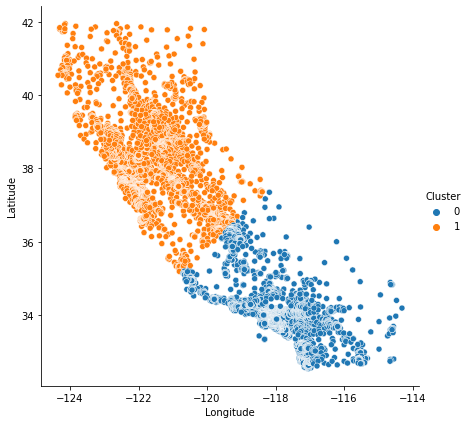

In [8]:
sns.relplot(
    x="Longitude", y="Latitude", hue="Cluster", data=X, height=6,
);

Cluster sayısı 2 olduğunda cluster merkezleri ve silüet skoru:

In [9]:
kmeans.cluster_centers_

array([[   3.92232104,   33.93925634, -118.00670714],
       [   3.7997717 ,   37.95527762, -121.71520979]])

In [10]:
score = silhouette_score(X, kmeans.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.574


###Cluster sayısı 4 olursa:

In [11]:
kmeans = KMeans(n_clusters=4)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

X.head(10)

,MedInc,Latitude,Longitude,Cluster
0,8.3252,37.88,-122.23,2
1,8.3014,37.86,-122.22,2
2,7.2574,37.85,-122.24,2
3,5.6431,37.85,-122.25,2
4,3.8462,37.85,-122.25,1
5,4.0368,37.85,-122.25,1
6,3.6591,37.84,-122.25,1
7,3.1200,37.84,-122.25,1
8,2.0804,37.84,-122.26,1
9,3.6912,37.84,-122.25,1


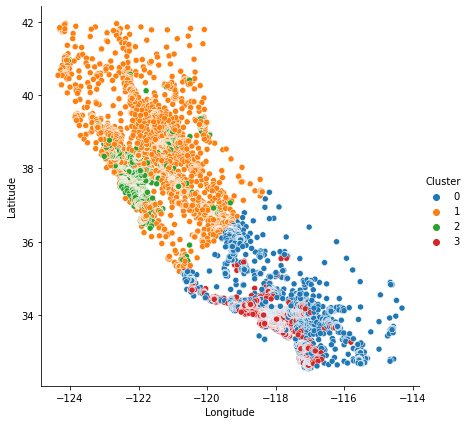

In [12]:
sns.relplot(
    x="Longitude", y="Latitude", hue="Cluster", data=X, height=6,
);

Cluster sayısı 4 olduğunda cluster merkezleri ve silüet skoru:

In [13]:
kmeans.cluster_centers_

array([[ 3.04214385e+00,  3.39654255e+01, -1.17988327e+02,
        -2.60902411e-14],
       [ 2.91925218e+00,  3.80641198e+01, -1.21624535e+02,
         1.00000000e+00],
       [ 6.12810494e+00,  3.76661113e+01, -1.21954843e+02,
         9.98744244e-01],
       [ 6.41421727e+00,  3.38650851e+01, -1.18057512e+02,
         2.10942375e-15]])

In [14]:
score = silhouette_score(X, kmeans.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.524


###Cluster sayısı 5 olursa:

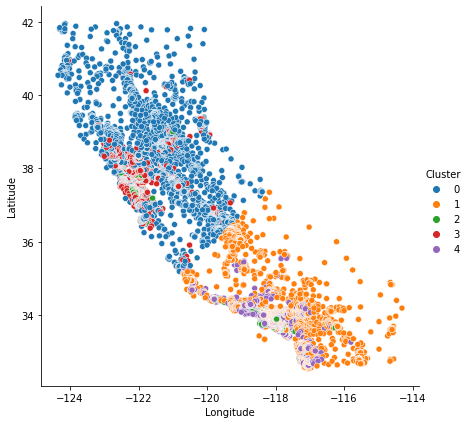

In [15]:
kmeans = KMeans(n_clusters=5)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

sns.relplot(
    x="Longitude", y="Latitude", hue="Cluster", data=X, height=6,
);

Cluster sayısı 5 olduğunda cluster merkezleri ve silüet skoru:

In [16]:
kmeans.cluster_centers_

array([[ 2.90153929e+00,  3.80696922e+01, -1.21618854e+02,
         1.00000000e+00],
       [ 3.03965942e+00,  3.39659498e+01, -1.17988595e+02,
         1.19015908e-13],
       [ 1.13113759e+01,  3.51440253e+01, -1.19501519e+02,
         2.66329114e+00],
       [ 5.76545011e+00,  3.76711765e+01, -1.21953177e+02,
         1.97166166e+00],
       [ 5.96986804e+00,  3.38579449e+01, -1.18043524e+02,
         3.00000000e+00]])

In [17]:
score = silhouette_score(X, kmeans.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.572


###Cluster sayısı 6 olursa:

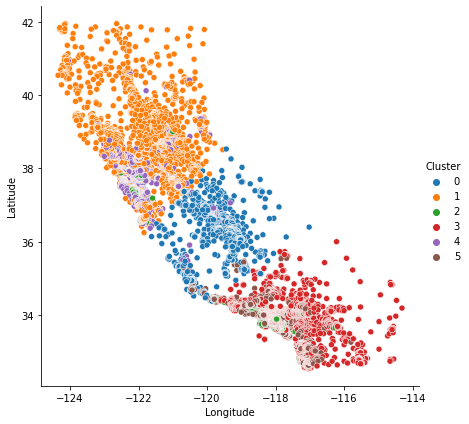

In [18]:
kmeans = KMeans(n_clusters=6)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

sns.relplot(
    x="Longitude", y="Latitude", hue="Cluster", data=X, height=6,
);

Cluster sayısı 6 olduğunda cluster merkezleri ve silüet skoru:

In [19]:
kmeans.cluster_centers_

array([[ 2.58887084e+00,  3.61121184e+01, -1.19707869e+02,
         4.59190031e-01],
       [ 2.95950874e+00,  3.82950464e+01, -1.21889542e+02,
         6.77236045e-14],
       [ 1.13188647e+01,  3.51396701e+01, -1.19500812e+02,
         2.00000000e+00],
       [ 3.07980141e+00,  3.38284198e+01, -1.17857531e+02,
         1.00000000e+00],
       [ 5.77953631e+00,  3.76726127e+01, -1.21951274e+02,
         3.00000000e+00],
       [ 5.96986804e+00,  3.38579449e+01, -1.18043524e+02,
         4.00000000e+00]])

In [20]:
kmeans.labels_

array([4, 4, 4, ..., 1, 1, 1], dtype=int32)

In [21]:
score = silhouette_score(X, kmeans.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.543


###Cluster sayısı 7 olursa:

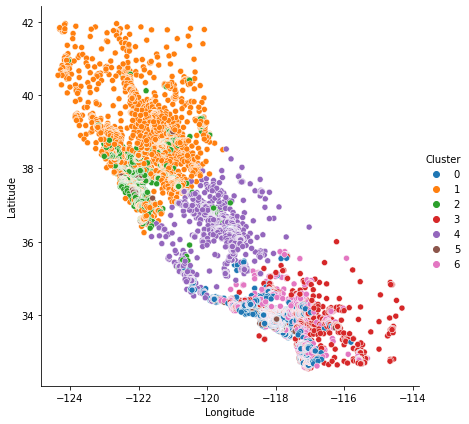

In [22]:
kmeans = KMeans(n_clusters=7)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

sns.relplot(
    x="Longitude", y="Latitude", hue="Cluster", data=X, height=6,
);

Cluster sayısı 7 olduğunda cluster merkezleri ve silüet skoru:

In [23]:
kmeans.cluster_centers_

array([[ 5.96986804e+00,  3.38579449e+01, -1.18043524e+02,
         5.00000000e+00],
       [ 2.95950874e+00,  3.82950464e+01, -1.21889542e+02,
         1.00000000e+00],
       [ 5.77953631e+00,  3.76726127e+01, -1.21951274e+02,
         4.00000000e+00],
       [ 2.21218958e+00,  3.37683644e+01, -1.17730468e+02,
         3.00000000e+00],
       [ 2.58828953e+00,  3.61131671e+01, -1.19707868e+02,
        -1.15463195e-14],
       [ 1.13188647e+01,  3.51396701e+01, -1.19500812e+02,
         2.00000000e+00],
       [ 3.77387326e+00,  3.38765901e+01, -1.17959577e+02,
         3.00000000e+00]])

In [24]:
score = silhouette_score(X, kmeans.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.563
